## K-means

In [6]:
%matplotlib inline

import numpy as np
import random 
from scipy.spatial.distance import euclidean


def _converged(y_previous, y_new):
    return np.array_equal(y_previous, y_new)


class KMeans(object):
    
    def __init__(self, k=8):
        self.k = k
        self.classes_ = range(k)
        self.means = None
        self.current_classes = None
        
    def fit(self, X, y=None):
        self.means = np.vstack(random.sample(X, self.k ))
        
        current_classes = np.ones((len(X),))
        last_classes = np.zeros((len(X),))
            

        while not _converged(current_classes, last_classes):
            last_classes[:] = current_classes
            
            print last_classes
            
            # Przypisz wektor do akutalnej klasy
            for idx, vector in enumerate(X):
                current_classes[idx] = self._assign_classes(vector)
                      
            # Wylicz średnie
            print "iteracja"
            for klass in self.classes_:
                self.means[klass] = np.mean(X[current_classes == klass],axis=0)
           
        self.current_classes = current_classes
        return self 
          
    
    def _assign_classes(self, vector):
        distances = [euclidean(vector, m) for m in self.means]
        return np.argmin(distances)
        

In [7]:
# Testowanie
from sklearn.datasets import make_classification

X, y = make_classification()

In [8]:
k_means = KMeans(k=8)

In [9]:
k_means.fit(X)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
iteracja
[ 3.  0.  0.  0.  5.  3.  2.  1.  0.  0.  1.  0.  3.  0.  7.  0.  0.  0.
  7.  1.  0.  0.  0.  0.  7.  7.  7.  1.  1.  1.  5.  0.  0.  0.  7.  3.
  6.  5.  3.  3.  4.  0.  5.  6.  0.  0.  0.  7.  0.  0.  1.  7.  4.  7.
  0.  0.  3.  1.  0.  1.  0.  1.  2.  0.  3.  7.  0.  0.  7.  0.  1.  0.
  4.  5.  0.  0.  0.  1.  0.  1.  5.  7.  2.  3.  0.  0.  1.  3.  1.  3.
  1.  0.  4.  2.  3.  0.  0.  6.  0.  7.]
iteracja
[ 3.  1.  0.  0.  5.  3.  2.  7.  0.  0.  1.  3.  3.  0.  7.  3.  0.  0.
  7.  1.  0.  0.  0.  0.  7.  7.  7.  1.  1.  1.  5.  0.  2.  0.  4.  3.
  6.  5.  1.  3.  4.  

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
#y = k_means.current_classes
#print X.shape, y.shape
#colors = np.array([int(i % 8) for i in k_means.current_classes])#.reshape(len(X), 1)
#plt.scatter(X[0], X[1], c=colors, cmap=plt.cm.cool)

## Soft K-means

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Funkcja odległości
def d(x, y):
    diff = x - y
    return diff.dot(diff)

# Funkcja kosztu
def cost(X, R, M):
    cost = 0
    for k in xrange(R.shape[1]):
        for n in xrange(len(X)):
            cost += R[n, k]*d(M[k], X[n])
    return cost 
       
def cluster_resp(x, cm, beta):
    cld = np.exp(-beta * np.array([d(x, c) for c in cm]))
    return cld / np.sum(cld)  


class SoftKMeans(object):
    
    def __init__(self, max_iter=20, k=8, beta=1.0):
        self.k = k
        #self.classes_ = range(k)
        self.means = None
        #self.current_classes = None
        self.R = None
        self.max_iter = max_iter
        self.beta = beta
        
        self.costs = None
        
    def fit(self, X, y=None):
        
        # Macierz cluster responsabilities (n_samples, n_clusters)
        self.R = np.zeros((len(X), self.k))
        
        # Inicjalizacja randomowych środków
        self.means = np.vstack(random.sample(X, self.k ))
        #print self.means.shape
        
        # Koszty
        self.costs = np.zeros(self.max_iter)
        
        # Rysowanie wykresów dla każdej iteracji
#         grid_width = 5
#         grid_heigth = self.max_iter / grid_width
#         random_colors = np.random.random((self.k, 3))
        

        # Pętla for po wszystkich zadanych iteracjach
        for i in xrange(self.max_iter):
            
            # Rysowanie wykresów w iteracjach
#             colors = self.R.dot(random_colors)
#             plt.subplot(grid_width, grid_heigth, i+1)
#             plt.scatter(X[:, 0], X[:, 1], c=colors)
    
            # Wypełnianie maicerzy cluster responsibilities
            for j in xrange(len(X)):
                self.R[j, :] = cluster_resp(X[j], self.means, self.beta)
             
            for k in xrange(self.k):
                self.means[k] = self.R[:, k].dot(X) / self.R[:, k].sum()
            
            self.costs[i] = cost(X, self.R, self.means)
            
            # Warunek stopu: kończy wcześniej wykonywanie pętli for
            if i > 0:
                if np.abs(self.costs[i] - self.costs[i-1]) < 0.1:
                    break  
        plt.show()            
        return self 
    
    def plot_costs(self):
        plt.plot(self.costs)
        plt.title("Costs")
        plt.show()
        return self
    
    def plot_clusters(self, X):
        random_colors = np.random.random((self.k, 3))
        colors = self.R.dot(random_colors)
        plt.scatter(X[:, 0], X[:, 1], c=colors)
        plt.show()
        return self
        

In [13]:
def plot_clusters(X, k, beta):
#     D = 2
#     s = 4
#     mu1 = np.array([0, 0])
#     mu2 = np.array([s, s])
#     mu3 = np.array([0, s])
    
#     N = 900
#     X = np.zeros((N, D))
#     X[:300, :] = np.random.randn(300, D) + mu1
#     X[300:600, :] = np.random.randn(300, D) + mu2
#     X[600:, :] = np.random.randn(300, D) + mu3
    
    plt.scatter(X[:, 0], X[:, 1])
    plt.show()
    
  
    skm = SoftKMeans(k=k, beta=beta).fit(X).plot_costs().plot_clusters(X)
    #skm.plot_clusters(X)
    #print skm.R
    

In [14]:
#plot_clusters(3, 2.0)

## Gdzie K-means sobie nie radzi

In [15]:
# Problem donuta (klaster wokół klastra)

In [16]:
def donut(N=1000, D=2):
    
    R_inner = 5
    R_outer = 10
    
    # Środek
    R1 = np.random.randn(N/2) + R_inner
    theta = 2*np.pi*np.random.random(N/2)
    X_inner = np.concatenate([[R1 * np.cos(theta)], [R1*np.sin(theta)]]).T
    
    # Zewnętrze
    R2 = np.random.randn(N/2) + R_outer
    theta = 2*np.pi*np.random.random(N/2)
    X_outer = np.concatenate([[R2 * np.cos(theta)], [R2*np.sin(theta)]]).T
    
    X = np.concatenate([X_inner, X_outer])
    
    return X



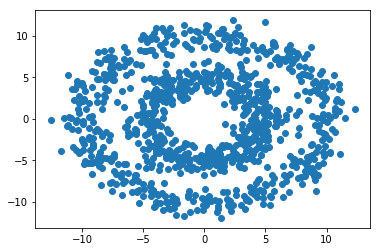

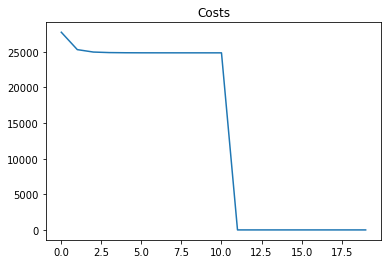

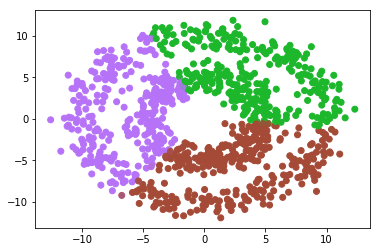

In [38]:
X = donut()
plot_clusters(X, 3, 1.0)

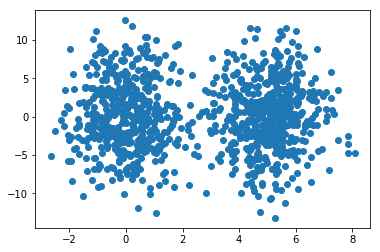

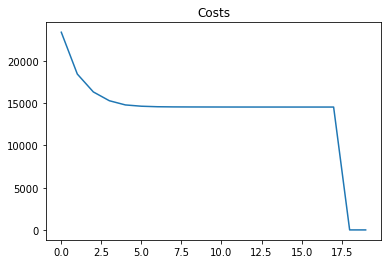

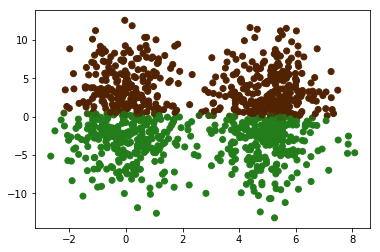

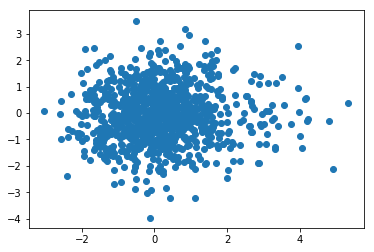

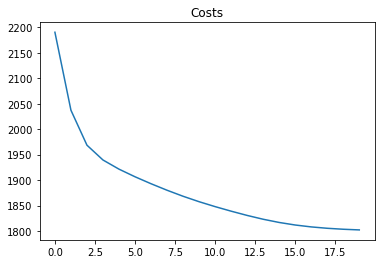

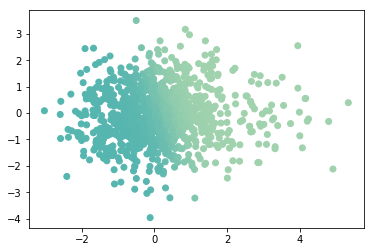

In [39]:
# elongated clusters
X = np.zeros((1000, 2))
X[:500,:] = np.random.multivariate_normal([0, 0], [[1, 0], [0, 20]], 500)
X[500:,:] = np.random.multivariate_normal([5, 0], [[1, 0], [0, 20]], 500)
#plot_k_means(X, 2)
plot_clusters(X, 2, 1.0)

 # different density
X = np.zeros((1000, 2))
X[:950,:] = np.array([0,0]) + np.random.randn(950, 2)
X[950:,:] = np.array([3,0]) + np.random.randn(50, 2)
 #plot_k_means(X, 2)
plot_clusters(X, 2, 1.0)

## MNIST

In [17]:
import pandas as pd
from datetime import datetime


def get_mnist(limit=None):
    print "Loading..."
    df = pd.read_csv('../machine_learning_examples/mnist_csv/Xtrain.txt')
    data = df.as_matrix()
    np.random.shuffle(data)
    X = data / 255.
    Y = pd.read_csv('../machine_learning_examples/mnist_csv/label_train.txt').as_matrix()
    if limit is not None:
        X, Y = X[:limit], Y[:limit]
    print "Loaded"    
    return X, Y

In [18]:
# Metryki jakości klastrowania
def purity(Y, R, n_classes, n_clusters):
    '''
    
    We suppose the classes are marked with 
    numbers in range 0-n_clusters and 0-n_samples respectively
    
    Y: ndarray(n_samples, 1)
        Ground-truth labels
    R: ndarray(n_samples, 1)
        Responsibilities matrix   
    '''
    Y = Y.ravel()
    R = R.ravel()
    purity_matrix = np.zeros((n_clusters, n_classes))
    
    N = len(Y)
    
    for i in xrange(len(Y)):
        purity_matrix[Y[i], np.argmax(R[i])] += 1
    
    maxima = np.max(purity_matrix, axis=0)
    print maxima
    return np.sum(maxima/N)    

In [19]:
# Test metryki purity
X, y = get_mnist(limit=1000)

Loading...
Loaded


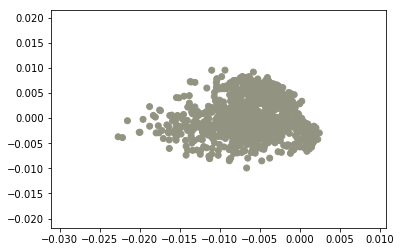

In [20]:
skf = SoftKMeans(max_iter=20, k=10, beta=1.0)
skf.fit(X).plot_clusters(X)
R = skf.R

In [21]:
n_clusters = 10
n_classes = 10


purity(y, R, n_classes, n_clusters)



[ 500.    0.    0.    0.    0.    0.    0.    0.    0.    0.]


0.5

In [22]:
# Metryka Davies Bouldin index
# Zaimplentować od nowa

def DBI(X, M, R):
    # wymiary macierzy
    K, D = M.shape
    
    # obliczam sigmy, tj. średnie odległości od środka w obrębie klastra
    sigma = np.zeros(K)
    
    for k in xrange(K):
        diffs = X - M[k]
        squared_distances = (diffs * diffs).sum(axis=1)
        wsd = R[:, k]*squared_distances
        sigma[k] = np.sqrt(wsd).mean()
        
    # calculate DBI
    dbi = 0
    for k in xrange(K):
        max_ratio = 0
        for j in xrange(K):
            if k != j:
                numerator = sigma[k] + sigma[j]
                denominator = np.linalg.norm(M[k] - M[j])
                ratio = numerator / denominator
                if ratio > max_ratio:
                    max_ratio = ratio
        dbi += max_ratio
    return dbi / K    
                
    
    

In [25]:
# Test metryki DBI
R = skf.R
M = skf.means

In [26]:
DBI(X, M, R)

1486699403.8585265